# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [121]:
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


Das colunas analisadas, todas seguem um padrão aceitável exceto a coluna 'Income' que está no tipo 'object'. Essa coluna deveria ser numérica para poder ser melhor usada nos treinamentos posteriores, portanto foi alterada para o tipo 'int' conforme código abaixo:

In [123]:
df['Income'] = df['Income'].str.replace(',00', '').str.replace('.', '').astype(int)
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000,Doctorate,Married,1,Owned,High
3,40.0,Male,125000,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000,Bachelor's Degree,Married,3,Owned,High


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

No .info() da parte de cima já podemos observar uma quantidade de valores nulos na coluna 'Age' assim como confirmado abaixo:

In [124]:
age_null = df['Age'].isnull().sum() / len(df) * 100
print(age_null)

20.73170731707317


Como a quantidade de valores nulos é alta (20%), resolvi por não remove-los e sim substitui-los pela média.

In [125]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age).astype(int)


Depois a coluna foi convertida para o tipo 'int' ao invés de 'float' para evitar idades quebradas como 37.5 por exemplo.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

Analisando as colunas categóricas (Gender, Education, Marital Status, Home Ownership e Credit Score) não foi encontrado nenhum erro de digitação conforme códigos abaixo:

In [126]:
print(df['Gender'].unique())

['Female' 'Male']


In [127]:
print(df['Education'].unique())

["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]


In [128]:
print(df['Marital Status'].unique())

['Single' 'Married']


In [129]:
print(df['Home Ownership'].unique())

['Rented' 'Owned']


In [130]:
print(df['Credit Score'].unique())

['High' 'Average' 'Low']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [131]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.402439,83765.243902,0.652439
std,7.564625,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


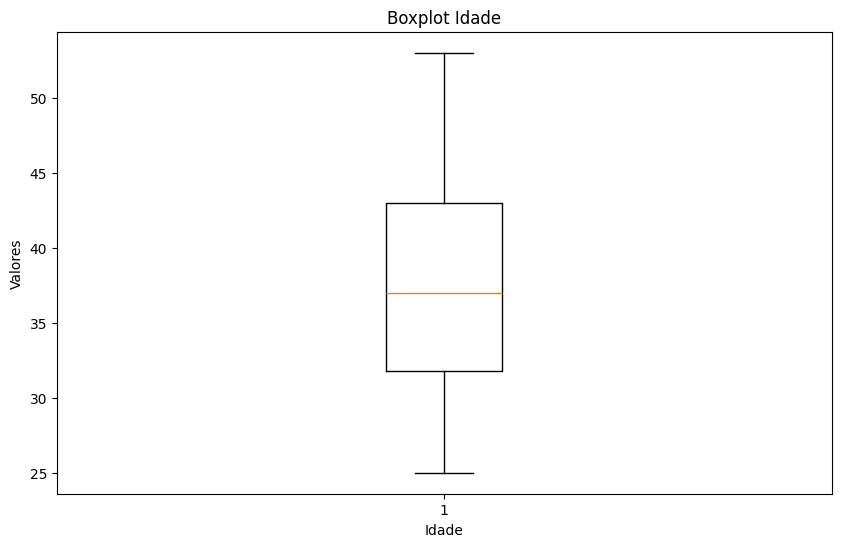

In [132]:
plt.figure(figsize=(10,6))

plt.boxplot(df['Age'])
plt.title('Boxplot Idade')
plt.xlabel('Idade')
plt.ylabel('Valores')
plt.show()

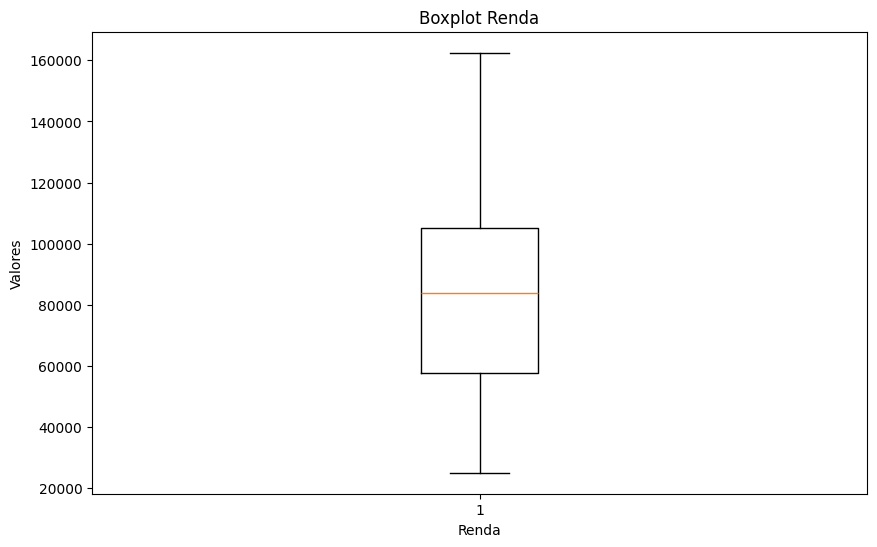

In [133]:
plt.figure(figsize=(10,6))

plt.boxplot(df['Income'])
plt.title('Boxplot Renda')
plt.xlabel('Renda')
plt.ylabel('Valores')
plt.show()

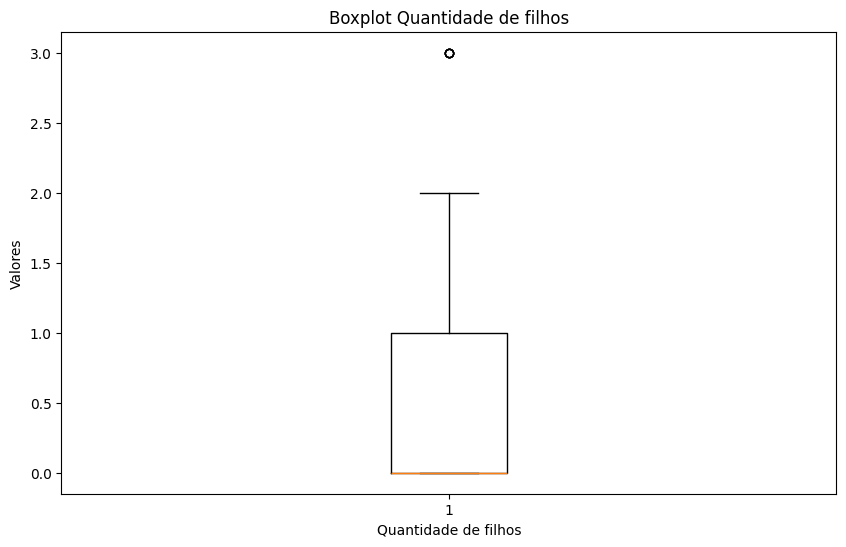

In [134]:
plt.figure(figsize=(10,6))

plt.boxplot(df['Number of Children'])
plt.title('Boxplot Quantidade de filhos')
plt.xlabel('Quantidade de filhos')
plt.ylabel('Valores')
plt.show()

In [135]:
filhos_outlier = df[df['Number of Children'] == 3].value_counts().sum() / len(df) * 100
print(filhos_outlier)

3.048780487804878


Analisando as 3 variáveis numéricas ('Idade','Income' e 'Number of Children') com o uso do boxplot, apenas o numero de crianças apresenta outliers (3 filhos). Como são apenas 5 registros (3%), eles foram removidos como apresentado no código abaixo:

In [136]:
df = df[df['Number of Children'] != 3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 159 non-null    int64 
 1   Gender              159 non-null    object
 2   Income              159 non-null    int64 
 3   Education           159 non-null    object
 4   Marital Status      159 non-null    object
 5   Number of Children  159 non-null    int64 
 6   Home Ownership      159 non-null    object
 7   Credit Score        159 non-null    object
dtypes: int64(3), object(5)
memory usage: 11.2+ KB


**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

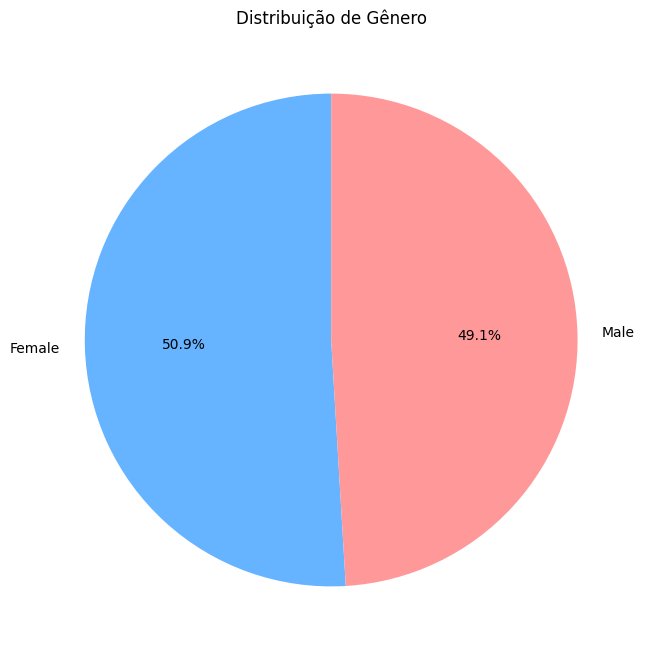

In [137]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999'],
    startangle=90
)
plt.title("Distribuição de Gênero")
plt.show()

A distribuição de gênero está bem equilibrada.

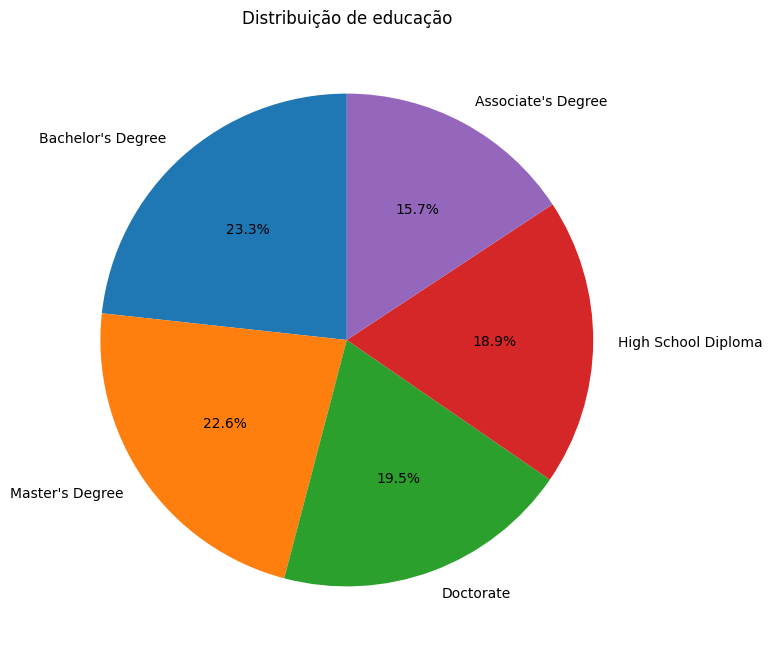

In [138]:
education_counts = df['Education'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    education_counts.values,
    labels=education_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição de educação")
plt.show()

O nível de educação também está equilibrado.

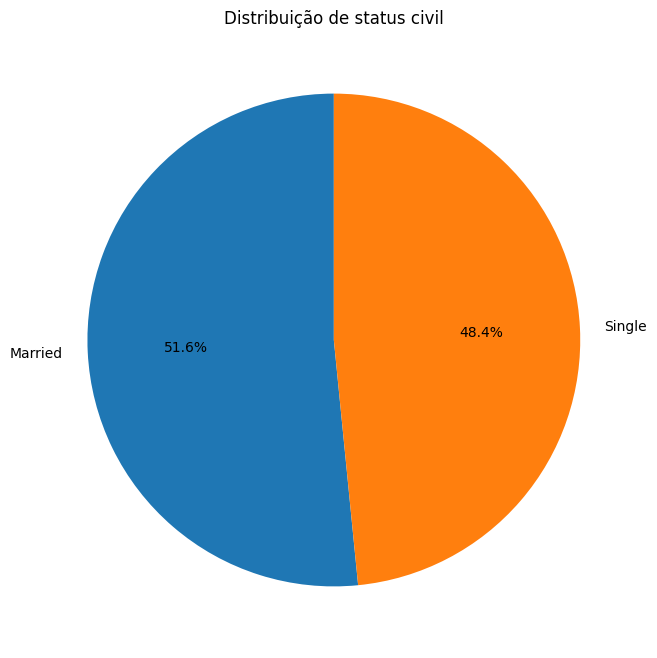

In [139]:
marital_counts = df['Marital Status'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    marital_counts.values,
    labels=marital_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição de status civil")
plt.show()

Distribuição de status civil também equilibrada.

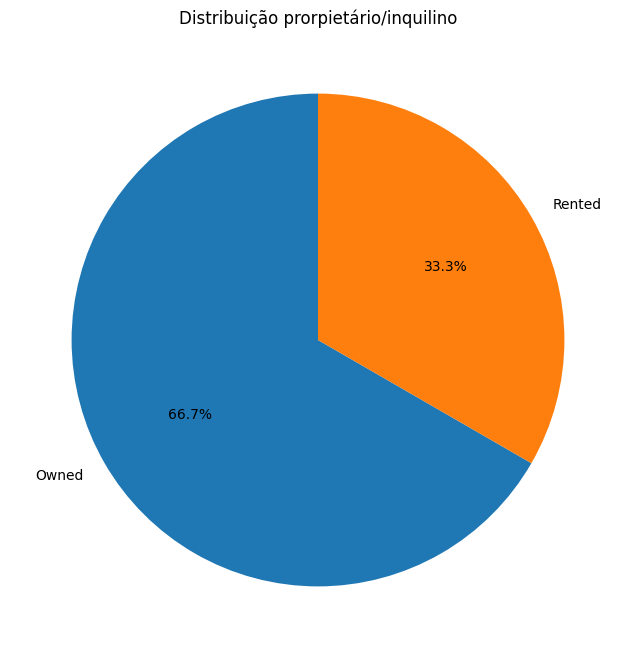

In [140]:
home_counts = df['Home Ownership'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    home_counts.values,
    labels=home_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição prorpietário/inquilino")
plt.show()

Nessa gráfico percebemos que a maior parte dos registros é composto por pessoas que possuem casa própria (66%).

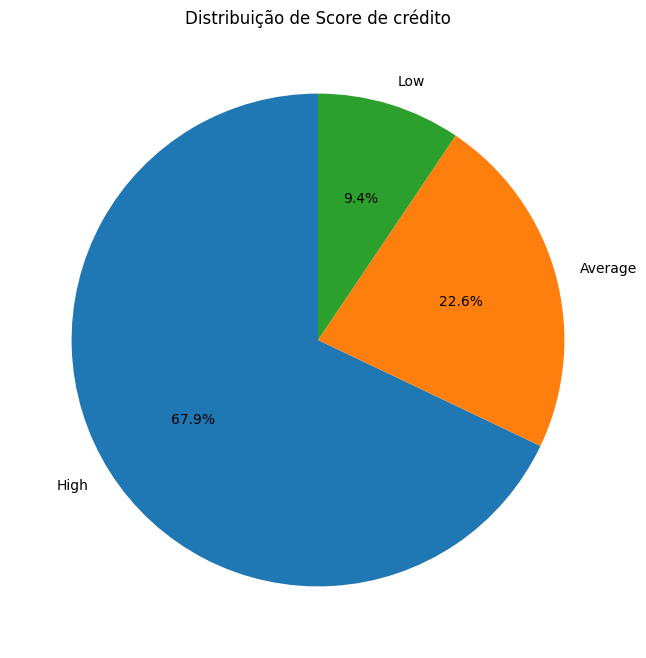

In [141]:
score_counts = df['Credit Score'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    score_counts.values,
    labels=score_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição de Score de crédito")
plt.show()

Nessa distribuição percebe-se que a maior parte das pessoas do dataframe apresentam score de crádito alto (67%), seguido do score intermediário (22%) e depois o score baixo (9%).

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não foi encontrado nenhum outlier nas variáveis categóricas.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



##Existe relação entre a idade e o status civil?

Conforme mostrado no boxplot abaixo existe sim relação entre a idade e o status civil: A maior parte das pessoas casadas tende a ser mais velhas (acima de 35 anos) e apartir dos 45 anos, todos são casados.

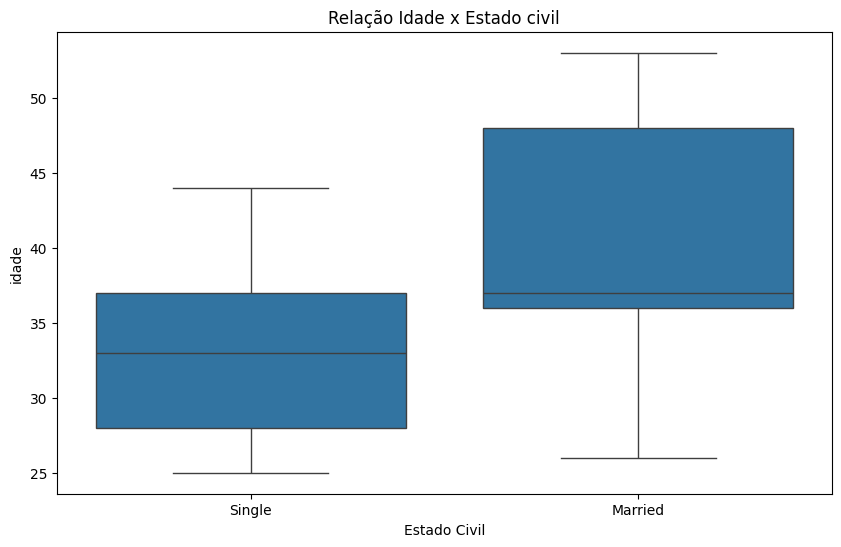

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Marital Status", y="Age", data=df)
plt.title('Relação Idade x Estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('idade')
plt.show()

##Qual a relação entre o score de crédito e o nível de escolaridade?

Com a análise do mapa de calor abaixo, nota-se que a relação entre score de crédito e nível de educação é fraco, tendo a maior relação entre pessoas com mestrado e maior score de crédito (0.36).

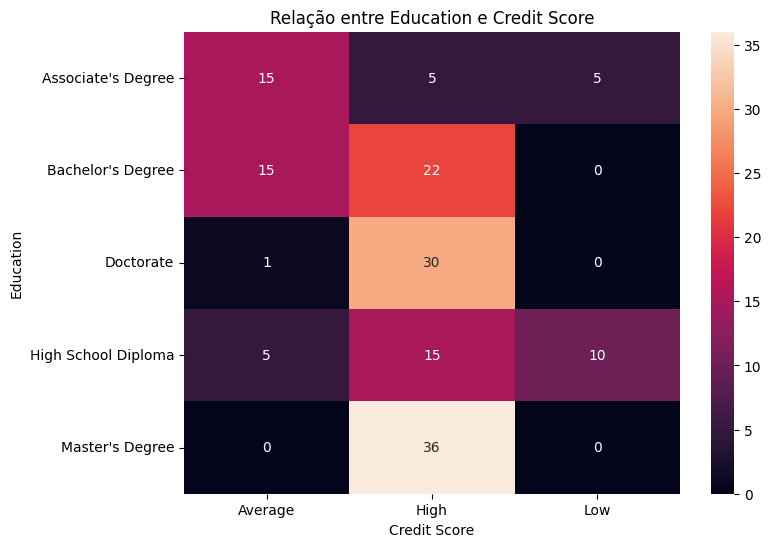

In [143]:
cross_tab = pd.crosstab(df['Education'], df['Credit Score'])

plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, fmt="d")
plt.title("Relação entre Education e Credit Score")
plt.ylabel("Education")
plt.xlabel("Credit Score")
plt.show()

##O salário parece influenciar na idade?

A idade apresenta relação com o salário (0.61) onde quanto maior a idade, maior o salário. Claro que por não ser uma relação perfeita, alguns valores fogem do esperado principalmente na idade de 37 que foi onde os valores nulos foram substituidos pelá média fazendo com que nessa idade o range de salário seja grande.

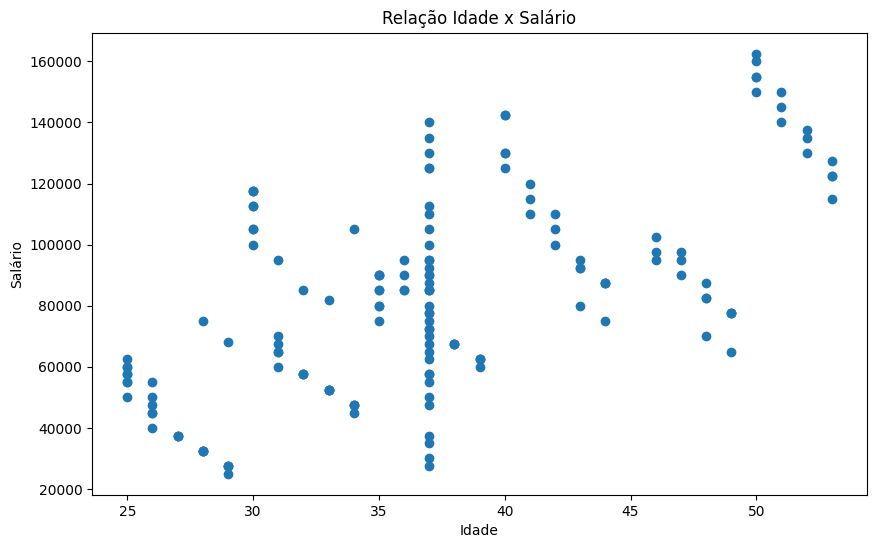

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(x="Age", y="Income", data=df)
plt.title('Relação Idade x Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

##O salário parece influenciar no Score de Crédito?

Conforme a análise do boxplot abaixo, o salário parece influenciar diretamente o score de crédito. Pessoas com salários maiores tem acesso ao nivel mais alto do Score.

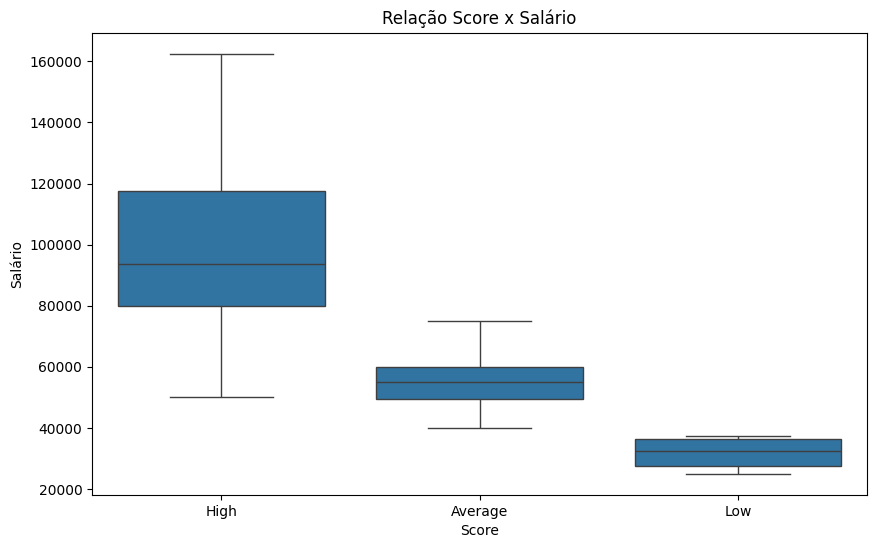

In [145]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Credit Score", y="Income", data=df)
plt.title('Relação Score x Salário')
plt.xlabel('Score')
plt.ylabel('Salário')

plt.show()

##Clientes com casa própria tendem a ter um score mais alto?

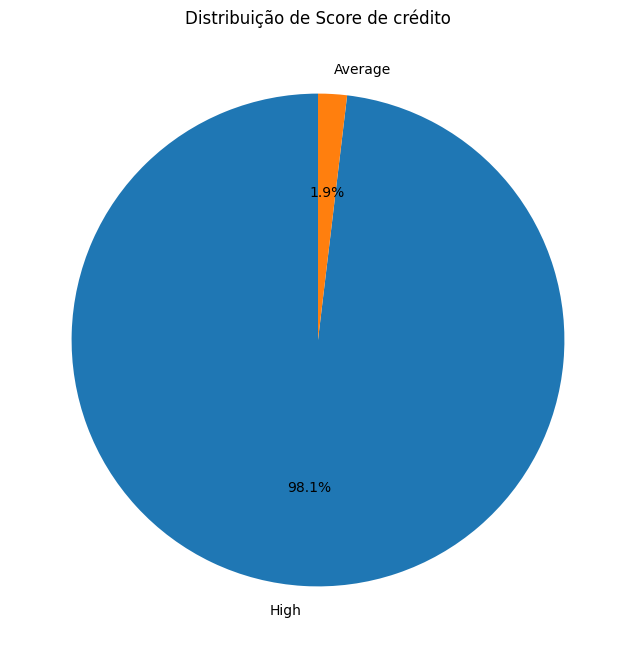

In [146]:
df_casa_propria = df[df['Home Ownership'] == 'Owned'].copy()

score_counts = df_casa_propria['Credit Score'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    score_counts.values,
    labels=score_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribuição de Score de crédito")
plt.show()

Partindo do gráfico acima é possível confirmar que existe relação entre pessoas com casas e score de crédito alto já que, das pessoas com casa, 98% possuem score alto.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

##Existe relação entre nível educacional e idade?

Separando os dados por nivel educacional e calculando a média de idade das pessoas em cada nível não é possível notar grandes discrepancias conforme gráfico abaixo:

/tmp/ipython-input-3872419453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Age", data=df, estimator='mean', palette="Blues")


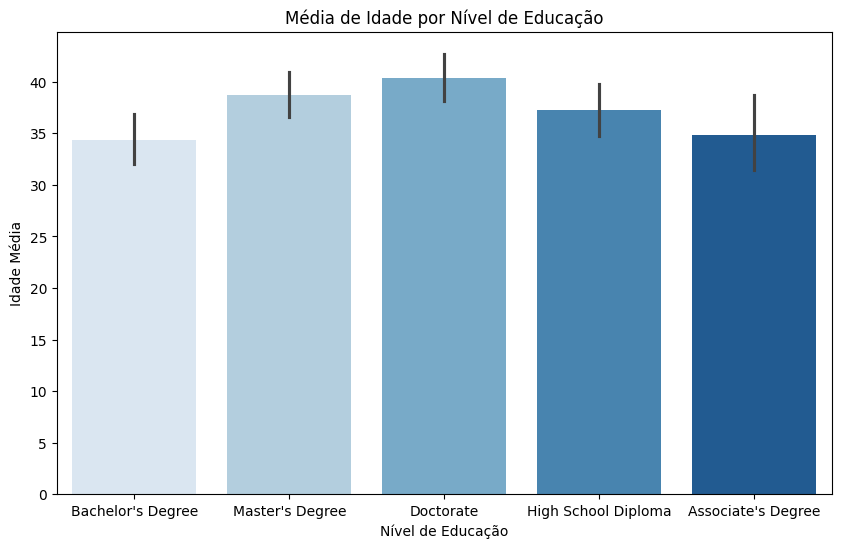

In [147]:
plt.figure(figsize=(10,6))
sns.barplot(x="Education", y="Age", data=df, estimator='mean', palette="Blues")

plt.title("Média de Idade por Nível de Educação")
plt.xlabel("Nível de Educação")
plt.ylabel("Idade Média")
plt.xticks(rotation=0)
plt.show()

##Existe relação entre renda e nível educacional?

Calculando a média da renda por nível educacional percebe-se que pessoas com "Master's Decree" (equivalente a mestrado) possuem uma média de renda superior aos outros. Enquanto que "Associate's Decree" (comparável com ensino técnico) possuem a menor média de renda.

/tmp/ipython-input-2113976562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Income", data=df, estimator='mean', palette="Spectral")


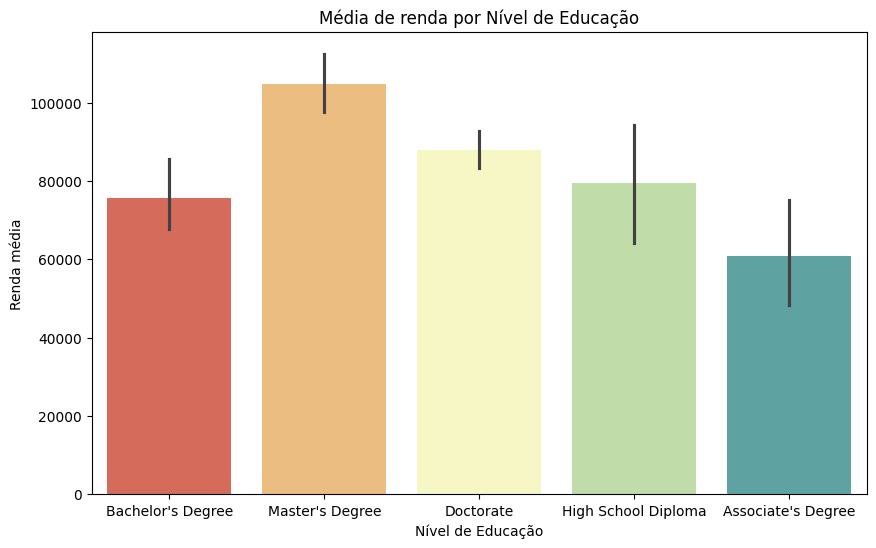

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(x="Education", y="Income", data=df, estimator='mean', palette="Spectral")

plt.title("Média de renda por Nível de Educação")
plt.xlabel("Nível de Educação")
plt.ylabel("Renda média")
plt.xticks(rotation=0)
plt.show()

##Qual a media de renda por gênero?

Agrupando por gênero, vemos que a média salarial de homens é maior que a média das mulheres conforme gráfico abaixo:

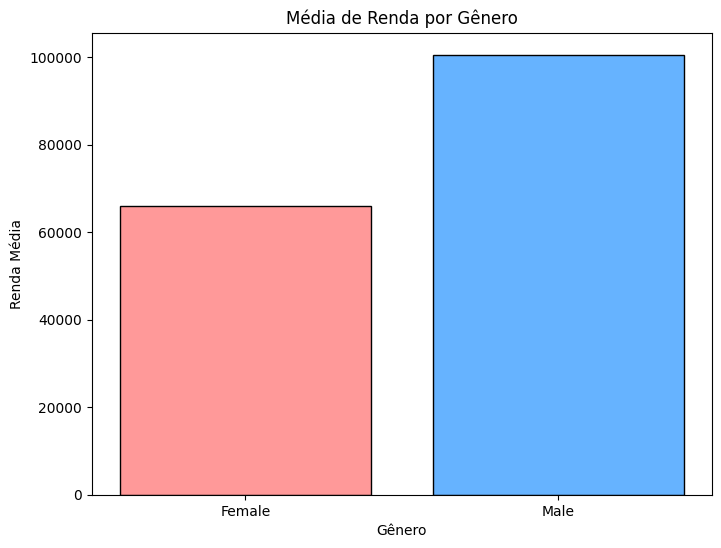

In [149]:
media_genero = df.groupby("Gender")["Income"].mean()

plt.figure(figsize=(8,6))
plt.bar(
    media_genero.index,
    media_genero.values,
    color=['#ff9999','#66b3ff'],
    edgecolor="black"
)

plt.title("Média de Renda por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Renda Média")
plt.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

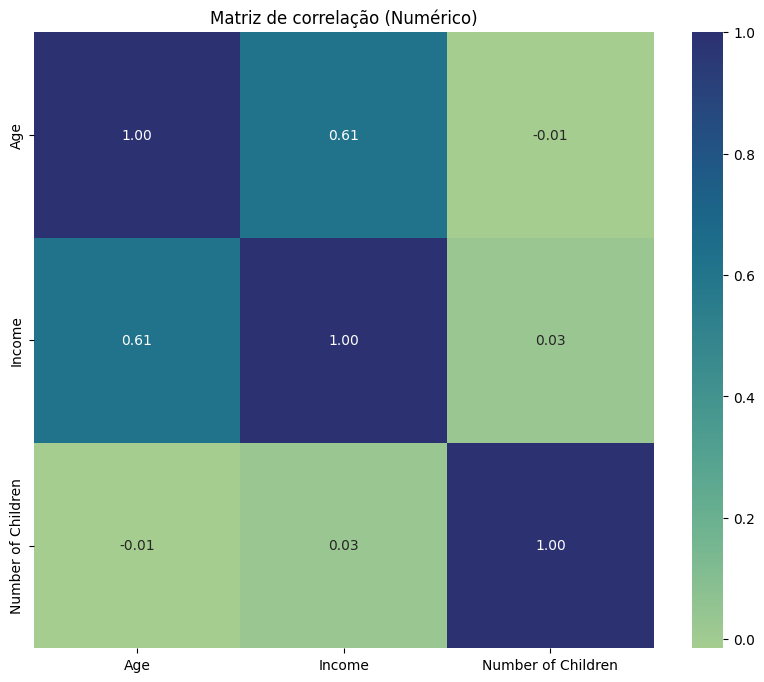

In [150]:
df_numeric = df.select_dtypes(include='number')
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="crest", annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title('Matriz de correlação (Numérico)')

plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

pelo gráfico de correlação das variáveis numéricas acima, a unica relação forte encontrada foi entre idade e renda. Essa relação parece fazer sentido visto que, quanto maior a idade maior tempo de estudo e experiência no mercado de trabalho, que costumam se relacionar com uma renda maior.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [151]:
label_enconder = LabelEncoder()

df['Gender_Enconded'] = label_enconder.fit_transform(df['Gender'])
df['Marital_Status_Enconded'] = label_enconder.fit_transform(df['Marital Status'])
df['Home_Ownership_Enconded'] = label_enconder.fit_transform(df['Home Ownership'])
df['Credit_Score_Enconded'] = label_enconder.fit_transform(df['Credit Score'])
df = df.drop(['Gender', 'Marital Status', 'Home Ownership'], axis=1)

df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)
df = pd.get_dummies(df, columns=['Credit Score'], prefix='Score', drop_first=True)

df[df.select_dtypes(bool).columns] = df.select_dtypes(bool).astype(int)
df.head()

,Age,Income,Number of Children,Gender_Enconded,Marital_Status_Enconded,Home_Ownership_Enconded,Credit_Score_Enconded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Score_High,Score_Low
0,25,50000,0,0,1,1,1,1,0,0,0,1,0
1,30,100000,2,1,0,0,1,0,0,0,1,1,0
2,35,75000,1,0,0,0,1,0,1,0,0,1,0
3,40,125000,0,1,1,0,1,0,0,1,0,1,0
5,50,150000,0,1,0,0,1,0,0,0,1,1,0


OBS: A coluna 'Credit Score' foi tratada com os dois métodos pois one hot fica melhor na visualização de mapa de calor e label encoder é necessária pra fazer o modelo de predição abaixo.

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

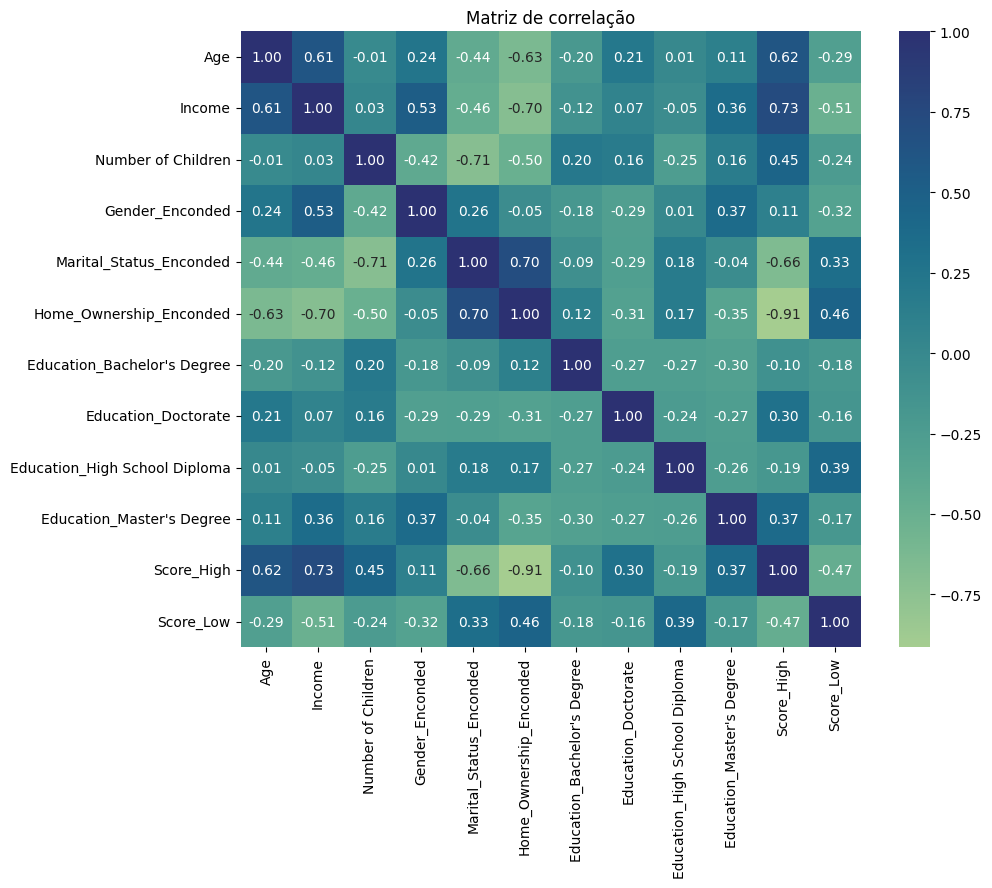

In [152]:
df_heat = df.drop('Credit_Score_Enconded',axis=1)
df_corr = df_heat.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap="crest", annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title('Matriz de correlação')

plt.show()

Legendas importantes do dataframe:

* Gender: 0 = Mulher, 1 = Homem
* Home_Ownership: 0 = Casa própria, 1 = Aluguel
* Marital_Status: 0 = Casado, 1 = Solteiro

Pela matriz de correlação plotado acima é possivel retirar alguns insigths como:

*   **Idade**: Existe uma relação forte entre idade e Score de crédito maior(0.62). Assim como idade menor se relaciona com morar de aluguel (0.63).
*   **Número de crianças**: Forte relação entre pessoas casadas e quantidade de filhos (0.71).
*   **Estado Civil**: Além da relação com filhos, pessoas casadas tem forte relação com a posse de imoveis (0.7).
*   **Educação**: o nível de educação não apresentou relações fortes com as outras variáveis.
*   **Score de crédito**: Além da relação com a idade, o score de crédito apresentou forte relacionamento com maior renda (0.73), possuir casa própria (0.91) e casamento(0.66).

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [153]:
X = df.drop(['Credit_Score_Enconded', 'Score_High', 'Score_Low'], axis=1)
y = df['Credit_Score_Enconded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test: ", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test: ", y_test.shape)

Tamanho de X_train: (127, 10)
Tamanho de X_test:  (32, 10)
Tamanho de y_train: (127,)
Tamanho de y_test:  (32,)


In [154]:
X_train

,Age,Income,Number of Children,Gender_Enconded,Marital_Status_Enconded,Home_Ownership_Enconded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
78,52,135000,0,1,0,0,0,0,1,0
143,36,85000,2,0,0,0,0,0,0,1
2,35,75000,1,0,0,0,0,1,0,0
89,37,77500,1,0,0,0,0,1,0,0
47,28,32500,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74,32,57500,0,1,1,1,0,0,0,0
110,52,137500,0,1,0,0,0,0,1,0
15,37,95000,0,1,1,0,0,0,0,1
95,35,90000,1,0,0,0,0,1,0,0


In [155]:
y_train

,Credit_Score_Enconded
78,1
143,1
2,1
89,1
47,2
...,...
74,0
110,1
15,1
95,1


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

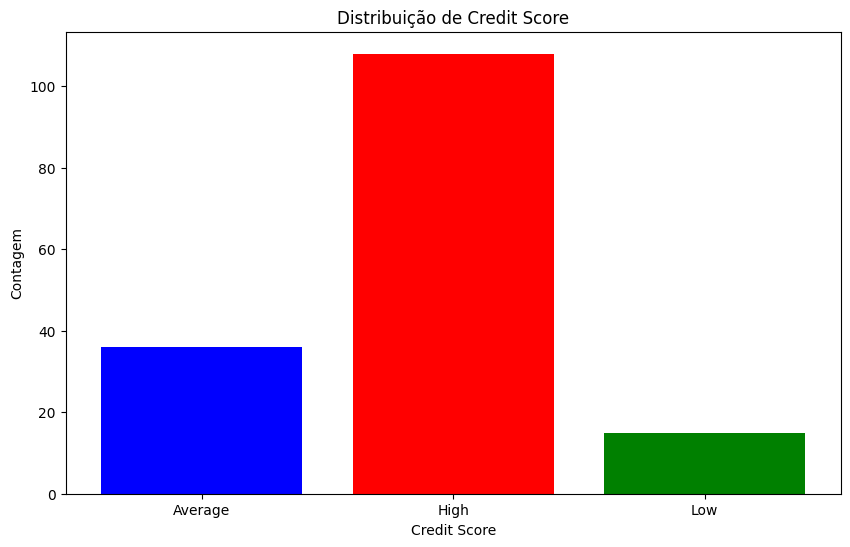

In [156]:
credit_score_count = df['Credit_Score_Enconded'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(
    credit_score_count.index,
    credit_score_count.values,
    color=['red','blue','green']
)

plt.xticks(ticks=[0,1,2], labels=['Average', 'High', 'Low'])

plt.xlabel("Credit Score")
plt.ylabel("Contagem")
plt.title("Distribuição de Credit Score")
plt.show()

O score de crédito não está balanceado pois existem poucos dados sobre score low e average, o que pode enviesar o modelo.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [157]:
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(y_train_balanced.value_counts())

Credit_Score_Enconded
1    87
2    87
0    87
Name: count, dtype: int64


#Salvando em csv

In [158]:
X_train.to_csv("X_train_M17.csv", index=False)
X_test.to_csv("X_test_M17.csv", index=False)
y_train.to_csv("y_train_M17.csv", index=False)
y_test.to_csv("y_test_M17.csv", index=False)